In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('carclaims.csv')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
df['FraudFound']=df['FraudFound'].map({'No':0,'Yes':1})

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [6]:
df.columns,len(df.columns)

(Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
        'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
        'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
        'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
        'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
        'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
        'PoliceReportFiled', 'WitnessPresent', 'AgentType',
        'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
        'BasePolicy', 'FraudFound'],
       dtype='object'),
 33)

In [7]:
#Dropping irrelevant columns


drop_cols = ['Month','DayOfWeek','AccidentArea','DayOfWeekClaimed','Sex','Days:Policy-Accident','Days:Policy-Claim','AgeOfPolicyHolder',
            'AddressChange-Claim','WeekOfMonth','WeekOfMonthClaimed','PolicyNumber','RepNumber','Year']

df.drop(drop_cols,axis=1,inplace=True)

In [8]:
df.shape

(15420, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Make                 15420 non-null  object
 1   MonthClaimed         15420 non-null  object
 2   MaritalStatus        15420 non-null  object
 3   Age                  15420 non-null  int64 
 4   Fault                15420 non-null  object
 5   PolicyType           15420 non-null  object
 6   VehicleCategory      15420 non-null  object
 7   VehiclePrice         15420 non-null  object
 8   Deductible           15420 non-null  int64 
 9   DriverRating         15420 non-null  int64 
 10  PastNumberOfClaims   15420 non-null  object
 11  AgeOfVehicle         15420 non-null  object
 12  PoliceReportFiled    15420 non-null  object
 13  WitnessPresent       15420 non-null  object
 14  AgentType            15420 non-null  object
 15  NumberOfSuppliments  15420 non-null  object
 16  Numb

In [10]:
df.isnull().values.any()

False

In [11]:
df.duplicated().any()

True

In [12]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Make: 19
MonthClaimed: 13
MaritalStatus: 4
Age: 66
Fault: 2
PolicyType: 9
VehicleCategory: 3
VehiclePrice: 6
Deductible: 4
DriverRating: 4
PastNumberOfClaims: 4
AgeOfVehicle: 8
PoliceReportFiled: 2
WitnessPresent: 2
AgentType: 2
NumberOfSuppliments: 4
NumberOfCars: 5
BasePolicy: 3
FraudFound: 2


In [13]:
# segregating categorical and numerical columns for LabelEncoding on categorical columns

# categorical_cols = []
# num_cols = []
# for col in df.columns:
#     if df[col].dtype=='O':
#         categorical_cols.append(col)
#     else:
#         num_cols.append(col)
        

In [14]:
# num_cols

C:\Users\tanze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


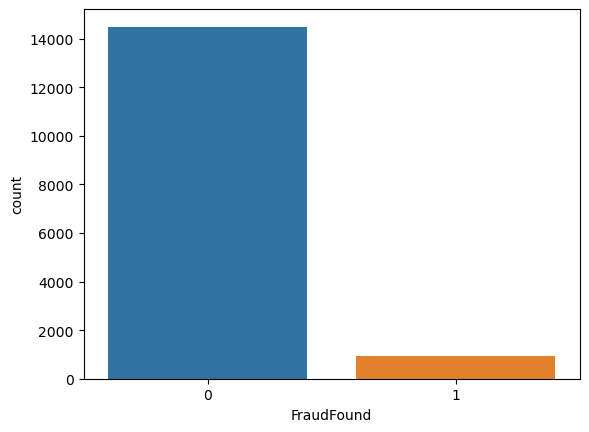

In [15]:
sns.countplot('FraudFound',data=df)
plt.show()

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
# Splitting into train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 2023) 

In [18]:
print(X_train.shape,X_test.shape)

(12336, 18) (3084, 18)


In [19]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

In [20]:
# segregating categorical and numerical columns for LabelEncoding on categorical columns

train_categorical_cols = []
train_num_cols = []
for col in X_train.columns:
    if X_train[col].dtype=='O':
        train_categorical_cols.append(col)
    else:
        train_num_cols.append(col)
        


test_categorical_cols = []
test_num_cols = []
for col in X_test.columns:
    if X_test[col].dtype=='O':
        test_categorical_cols.append(col)
    else:
        test_num_cols.append(col)

In [21]:
# Label Encoding the training categorical variables:

X_train_encoded = X_train[train_categorical_cols].apply(label_enc.fit_transform)

In [22]:
# Applying LabelEncoding

X_test_encoded = X_test[test_categorical_cols].apply(label_enc.fit_transform)

In [23]:
X_train_encoded.shape,X_test_encoded.shape

((12336, 15), (3084, 15))

In [24]:
# concatenating with numerical features for train dataset

X_train_concat = pd.concat([X_train_encoded,X_train[train_num_cols]],axis=1)

In [25]:
# concatenating with numerical features

X_test_concat = pd.concat([X_test_encoded,X_test[test_num_cols]],axis=1)

In [26]:
X_train_concat

,Make,MonthClaimed,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,BasePolicy,Age,Deductible,DriverRating
9000,16,10,1,1,1,0,0,3,4,0,0,0,2,0,1,45,400,4
226,14,11,1,1,1,0,1,3,5,0,0,0,3,4,1,26,400,2
13885,5,4,2,0,2,1,1,2,6,0,0,0,2,0,2,50,400,2
9536,12,1,2,0,2,1,0,2,4,0,0,0,3,0,2,33,400,2
8078,6,3,2,1,1,0,1,1,3,0,0,0,2,0,1,31,400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6049,6,3,1,1,1,0,1,3,5,0,0,0,3,0,1,44,400,3
2743,12,10,2,0,1,0,0,0,3,0,0,0,2,0,1,21,400,2
14790,8,12,1,0,2,1,0,2,5,0,0,0,3,0,2,33,500,2
5657,16,8,1,0,2,1,0,2,6,0,0,0,3,0,2,63,400,2


In [27]:
from imblearn.over_sampling import SMOTE   #importing smote

oversampling =  SMOTE() #initializing SMOTE

X_train_over , y_train_over  = oversampling.fit_resample(X_train_concat, y_train)

X_train_over.shape, y_train_over.shape

((23208, 18), (23208,))

In [28]:
X_test_over, y_test_over = oversampling.fit_resample(X_test_concat,y_test)

In [29]:
X_test_over.shape, y_test_over.shape

((5786, 18), (5786,))

In [30]:
y_test_over.value_counts()

0    2893
1    2893
Name: FraudFound, dtype: int64

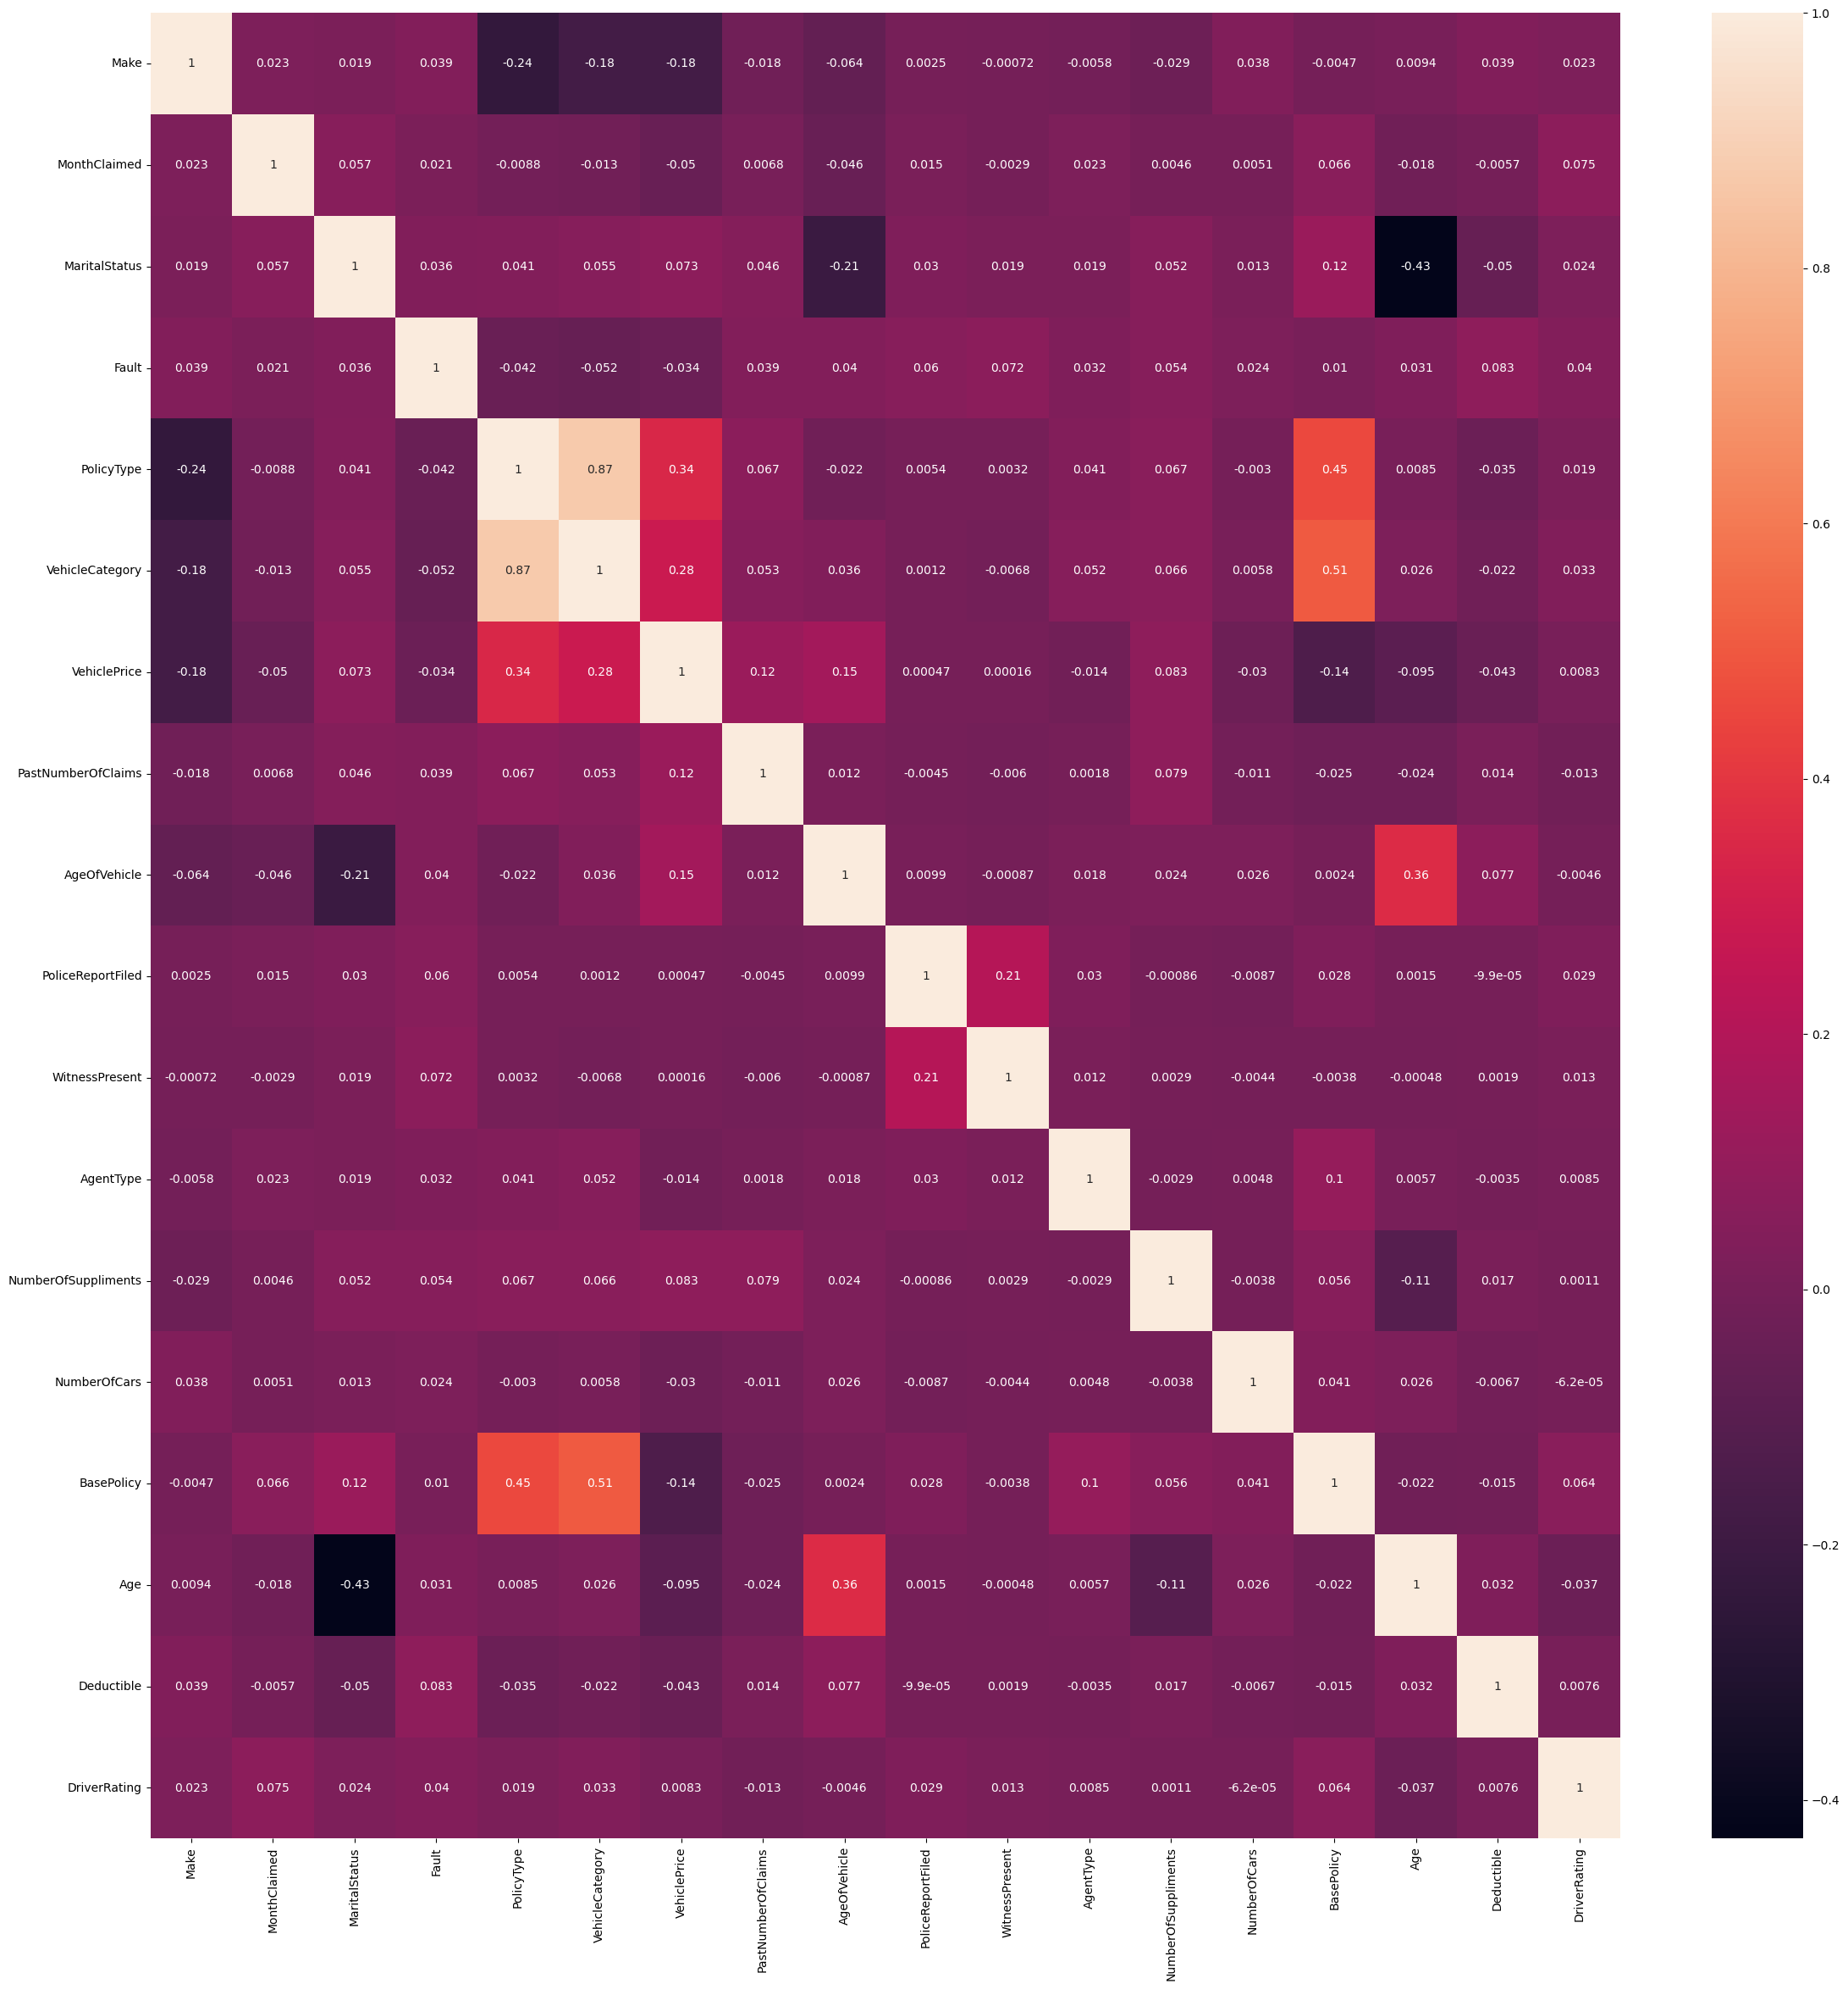

In [31]:
fig, ax = plt.subplots(figsize=(28,28)) 

sns.heatmap(X_train_over.corr(),annot=True)

plt.show()

In [32]:
X_train_over

,Make,MonthClaimed,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,BasePolicy,Age,Deductible,DriverRating
0,16,10,1,1,1,0,0,3,4,0,0,0,2,0,1,45,400,4
1,14,11,1,1,1,0,1,3,5,0,0,0,3,4,1,26,400,2
2,5,4,2,0,2,1,1,2,6,0,0,0,2,0,2,50,400,2
3,12,1,2,0,2,1,0,2,4,0,0,0,3,0,2,33,400,2
4,6,3,2,1,1,0,1,1,3,0,0,0,2,0,1,31,400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23203,6,8,1,0,2,0,5,2,4,0,0,0,3,0,1,30,400,4
23204,1,5,1,0,0,0,0,1,5,0,0,0,3,0,0,31,700,1
23205,8,2,1,0,3,0,5,2,4,0,0,0,1,0,1,34,400,1
23206,12,7,1,1,1,0,0,2,4,0,0,0,3,0,1,30,500,3


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [34]:
import random
params = {'n_estimators':random.sample(range(5,150),50),
         'max_features':random.sample(range(5,30),15),
         'min_samples_split': random.sample(range(5,15),5)}

In [35]:
rf_clf = RandomForestClassifier()

In [36]:
clf = RandomizedSearchCV(rf_clf,param_distributions=params,n_iter=100,cv=10,random_state=10)

In [37]:
model = clf.fit(X_train_over,y_train_over)

C:\Users\tanze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
370 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
370 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanze\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\tanze\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tanze\anaconda3\lib\site-package

In [45]:
model.best_params_

{'n_estimators': 145, 'min_samples_split': 5, 'max_features': 9}

In [46]:
predictions = model.predict(X_test_over)

In [47]:
from sklearn.metrics import classification_report, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

In [48]:
accuracy = accuracy_score(y_test_over,predictions)
accuracy

0.7839612858624265

In [49]:
print(classification_report(y_test_over,predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      2893
           1       0.89      0.65      0.75      2893

    accuracy                           0.78      5786
   macro avg       0.81      0.78      0.78      5786
weighted avg       0.81      0.78      0.78      5786



In [50]:
cm = confusion_matrix(y_test_over,predictions)

<AxesSubplot:>

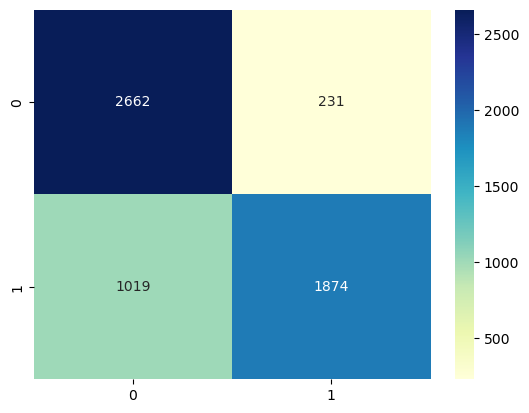

In [51]:
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')